In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import polytope as pc
from zonotope import Zonotope
from scipy.special import erf, erfinv
from scipy.stats import ortho_group

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


## Basic test of constructor and + operator

In [2]:
center = np.array([2,1])
generators = np.array([[1,1], [-1,1]])
cov = np.eye(2)

In [3]:
Z = Zonotope(center, generators, cov)
Z = Z + Zonotope(center, np.array([1,0]), np.eye(2))

G.shape = (2, 2)
other.G.shape = (2,)


In [4]:
A, b = Z.to_H()
p = pc.Polytope(A, b)

<IPython.core.display.Javascript object>


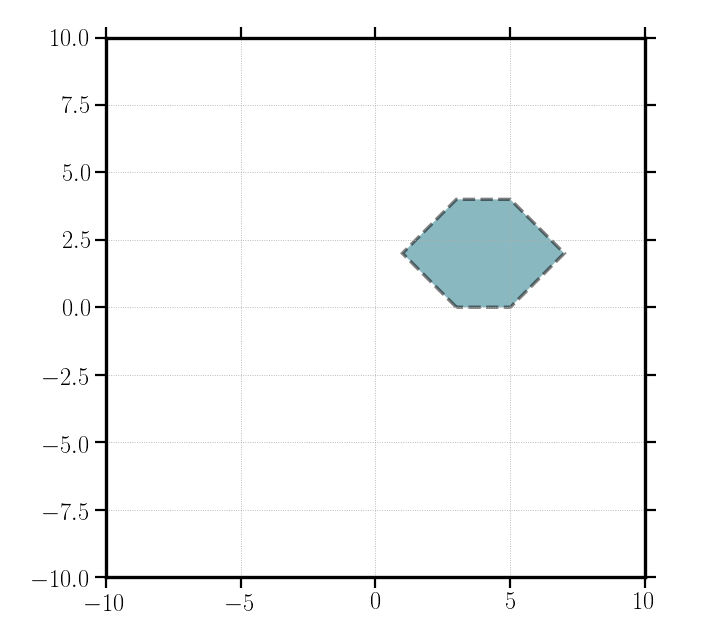

(-10.0, 10.0)

In [5]:
fig, ax = plt.subplots()
p.plot(ax=ax, alpha=0.5)
ax.set_aspect('equal')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

## Test of the reduction operator

In [ ]:
Z = Z + Zonotope(np.zeros((2,)), np.array([1,0.5]), np.eye(2))
Z = Z + Zonotope(np.zeros((2,)), np.array([1,2]), np.eye(2))
print(Z.G)
A, b = Z.to_H()
p1 = pc.Polytope(A, b)

In [ ]:
Z.reduce()
print(Z.G)
A, b = Z.to_H()
p2 = pc.Polytope(A, b)

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
p1.plot(ax=ax, alpha=0.5, color='blue')
p2.plot(ax=ax, alpha=0.5, color='red')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

## Test confidence sets

In [ ]:
center = np.array([2,1])
generators = np.array([[1,1], [-1,1]])
cov = np.array([[1,1], [0,1.5]])
Z = Zonotope(center, generators, cov)
Z = Z + Zonotope(center, np.array([1,0]), np.eye(2))

In [ ]:
# scaling_factors = np.array([0.5, 1.0, 1.5])
# scaling_factors = np.array([5,4,3,2,1])

scaling_factors = 2
confid_sets = Z.get_confidence_sets(scaling_factors)
print(len(confid_sets))

In [ ]:
fig, ax = plt.subplots()
p = Z.to_poly()
p.plot(ax=ax, alpha=0.2, color='black')

colors = ['blue', 'green', 'red']
idx = 0
for s in confid_sets:
    p = s.to_poly()
    p.plot(ax=ax, alpha=0.2, color=colors[idx%3])
    idx += 1
    
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

## Test intersection probability

In [ ]:
center = np.array([1,0.5])
generators = np.array([[1,1], [-1,1]])
cov = 2*np.eye(2)
Z1 = Zonotope(center, generators, cov)

# this is supposed to be an obstacle
center = np.array([5,4])
generators = np.array([[2,0], [0,1]])
cov = np.zeros((2,2))
Z2 = Zonotope(center, generators, cov)

In [ ]:
fig, ax = plt.subplots()
p1 = Z1.to_poly()
p1.plot(ax=ax, alpha=0.5, color='black')
p2 = Z2.to_poly()
p2.plot(ax=ax, alpha=0.5, color='blue')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

In [ ]:
scaling_factors = np.array([5,4,3,2,1])
p = Z1.get_inter_prob(Z2, scaling_factors=scaling_factors)
print(p)

## Test intersection of 2 probabilistic zonotopes

In [6]:
center = np.array([1,0.5])
generators = np.array([[1,1], [-1,1]])
cov = 2*np.eye(2)
Z1 = Zonotope(center, generators, cov)

# this is supposed to be an obstacle
center = np.array([8,6])
generators = np.array([[2,0], [0,1]])
cov = np.array([[1,1], [0,1.5]])
Z2 = Zonotope(center, generators, cov)

<IPython.core.display.Javascript object>


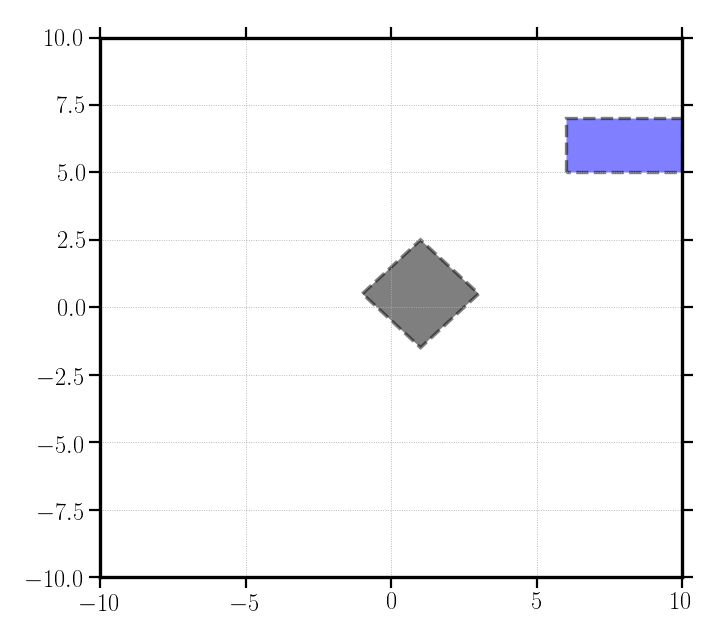

(-10.0, 10.0)

In [7]:
fig, ax = plt.subplots()
p1 = Z1.to_poly()
p1.plot(ax=ax, alpha=0.5, color='black')
p2 = Z2.to_poly()
p2.plot(ax=ax, alpha=0.5, color='blue')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

In [ ]:
Z2.intersect(Z1,2)

In [ ]:
Z2.intersect(Z1,1)

## Test inclusion

In [8]:
m = np.sqrt(2) * erfinv(0.9 ** 0.5)

Q1 = ortho_group.rvs(2)
Q2 = ortho_group.rvs(2)

center = np.array([1., 2.])
generators = np.array([[1,1], [-1,1]])
cov = Q1.T.dot(np.eye(2).dot(Q1))
Z1 = Zonotope(center, generators, cov)

center = np.array([1., 2.])
generators = np.array([[1,0], [0,1]])
cov = Q2.T.dot(1.5*np.eye(2).dot(Q2))
Z2 = Zonotope(center, generators, cov)

<IPython.core.display.Javascript object>


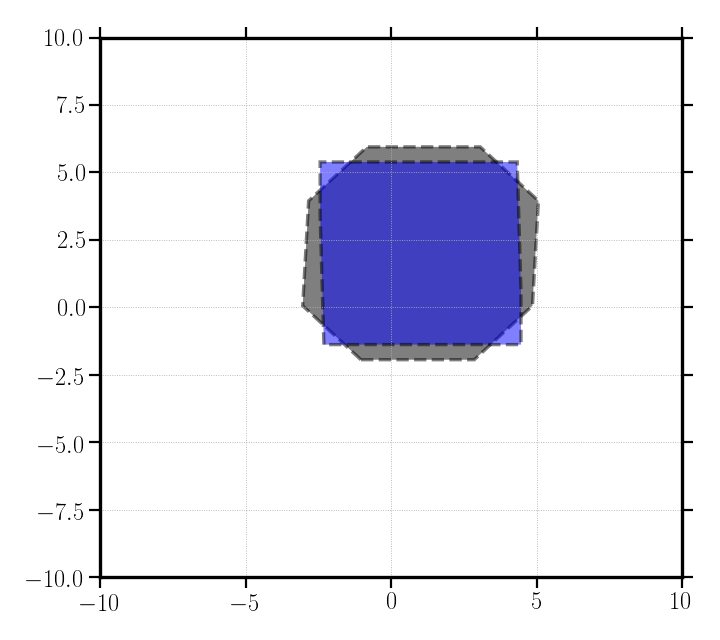

G.shape = (2, 2)
other.G.shape = (2, 2)
G.shape = (2, 2)
other.G.shape = (2, 2)


(-10.0, 10.0)

In [9]:
fig, ax = plt.subplots()
p1 = Z1.get_confidence_sets(m)[0].to_poly()
p1.plot(ax=ax, alpha=0.5, color='black')
p2 = Z2.get_confidence_sets(m)[0].to_poly()
p2.plot(ax=ax, alpha=0.5, color='blue')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

In [16]:
Z2<=Z1

False